# OK-Cupid-Date-A-Scientist 
#### Machine Learning Project from Codecademy

The following code analyzes the data of several members of a fictional online dating database. The code examines the distribution of several variables and uses machine learning to attempt to predict religion, body type, and astrological signs based on the other variables. 

The columns in the dataset include: 

* `age`: continuous variable of age of user
* `body_type`: categorical variable of body type of user
* `diet`: categorical variable of dietary information
* `drinks`: categorical variable of alcohol consumption
* `drugs`: categorical variable of drug usage
* `education`: categorical variable of educational attainment
* `ethnicity`: categorical variable of ethnic backgrounds
* `height`: continuous variable of height of user
* `income`: continuous variable of income of user
* `job`: categorical variable of employment description
* `offspring`: categorical variable of children status
* `orientation`: categorical variable of sexual orientation
* `pets`: categorical variable of pet preferences
* `religion`: categorical variable of religious background
* `sex`: categorical variable of gender
* `sign`: categorical variable of astrological symbol
* `smokes`: categorical variable of smoking consumption
* `speaks`: categorical variable of language spoken
* `status`: categorical variable of relationship status
* `last_online`: date variable of last login
* `location`: categorical variable of user locations

And a set of open short-answer responses to :

* `essay0`: My self summary
* `essay1`: What I’m doing with my life
* `essay2`: I’m really good at
* `essay3`: The first thing people usually notice about me
* `essay4`: Favorite books, movies, show, music, and food
* `essay5`: The six things I could never do without
* `essay6`: I spend a lot of time thinking about
* `essay7`: On a typical Friday night I am
* `essay8`: The most private thing I am willing to admit
* `essay9`: You should message me if…

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
profiles = pd.read_csv('/Users/sambshade/Desktop/OK-Cupid-Project/profiles.csv')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [4]:
profiles.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [5]:
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

## Distribution Plots

Several plots were developed below to visually see the distribution of several of the categorical and continuous variables, such as age, height, income, etc. These plots visualize how these factors differ amongst male and female members. 

### Distribution of Sex

The distribution of male vs. female members was examined. The distribution plot indicates that there are approximately 35,000 males in the dating app and around 25,000 females. 

Text(0.5, 1.0, 'Distribution of Age in Dating Profile Members')

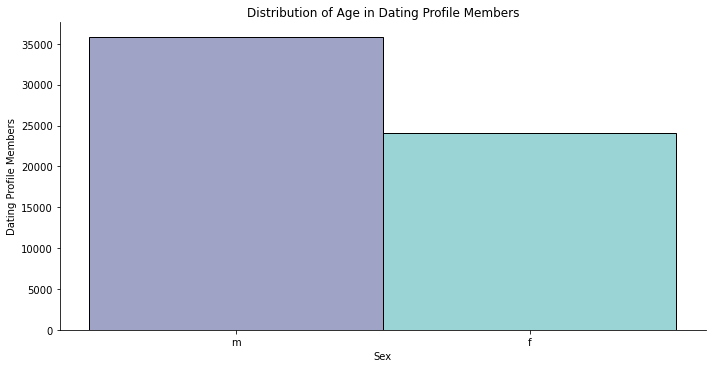

In [6]:
sns.displot(data=profiles, x='sex', kind='hist', hue='sex', binwidth=2, height=5, aspect=2, legend=False, palette='mako')
plt.xlabel('Sex')
plt.ylabel('Dating Profile Members')
plt.title('Distribution of Age in Dating Profile Members')

### Distribution of Age

The distribution of age was examined against sex. The majority of the program members are in their 20's and 30's. The distribution of age did not drastically change among sex. 

Text(0.5, 1.0, 'Distribution of Age based on Sex')

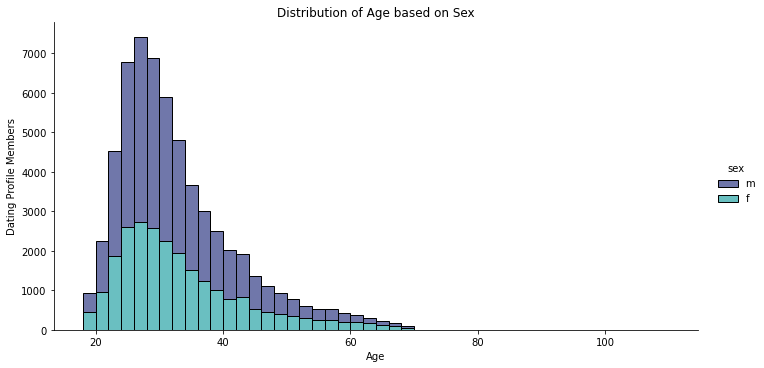

In [7]:
sns.displot(data=profiles, x='age', hue='sex', kind='hist', binwidth=2, multiple='stack', height=5, aspect=2, palette='mako')
plt.xlabel('Age')
plt.ylabel('Dating Profile Members')
plt.title('Distribution of Age based on Sex')

### Distribution of Height

The distribution of height was examined against sex. The majority of the program members did not indicate information regarding income as the distribution plots show a majority of the participants are near $0 income. The distribution of income does not show much difference amongst sex. 

Text(0.5, 1.0, 'Distribution of Height based on Sex')

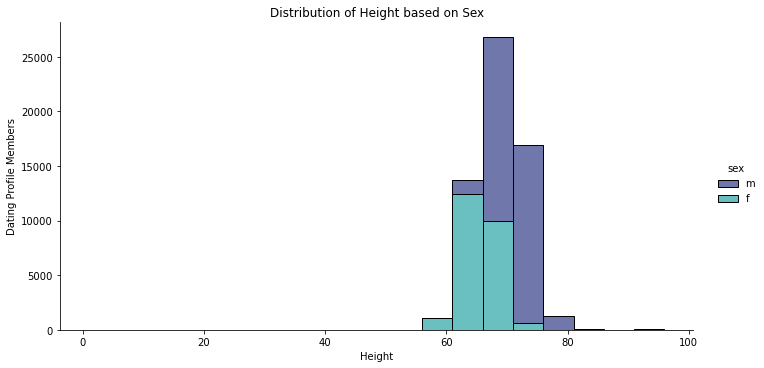

In [8]:
sns.displot(data=profiles, x='height', hue='sex', kind='hist', binwidth=5, multiple='stack', height=5, aspect=2,palette='mako')
plt.xlabel('Height')
plt.ylabel('Dating Profile Members')
plt.title('Distribution of Height based on Sex')

### Distribution of Income

The distribution of income was examined against sex. The majority of the program members did not indicate information regarding income as the distribution plots show a majority of the participants are near $0 income. The distribution of income does not show much difference amongst sex. 

Text(0.5, 1.0, 'Distribution of Income based on Sex')

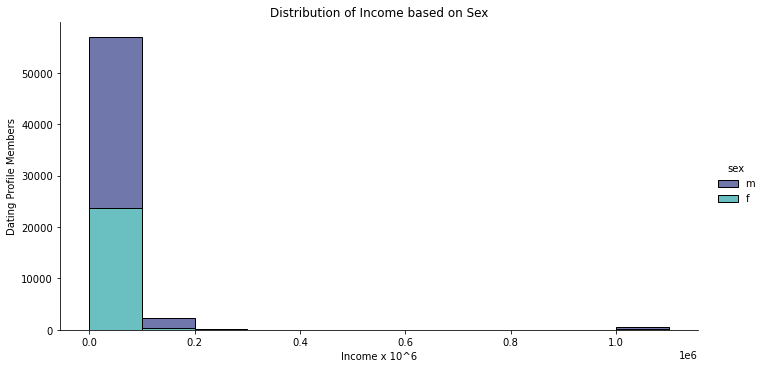

In [9]:
sns.displot(data=profiles, x='income', hue='sex', kind='hist', binwidth=100000, multiple='stack',height=5,aspect=2, palette='mako')
plt.xlabel('Income x 10^6')
plt.ylabel('Dating Profile Members')
plt.title('Distribution of Income based on Sex')

### Distribution of Body Type

The distribution of body types was examined against sex. The distribution of these body types were heavily sex dependent. Categories like: athletic, fit, jacked, have more male representation, whereas: curvy and full-figured have more female representation. Athletic, fit, and jacked, tend to have a more masculine meaning and curvy and full-figured tend to be more feminine. 

Text(0.5, 0, 'Dating Profile Members')

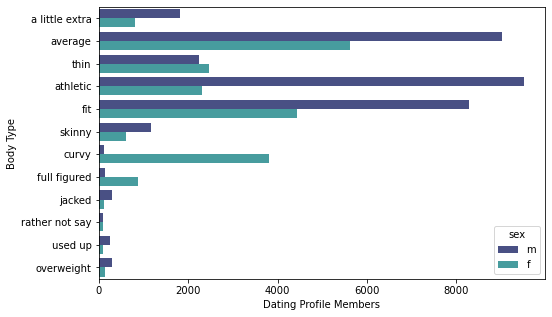

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(data=profiles, y='body_type', hue='sex', palette='mako')
plt.ylabel('Body Type')
plt.xlabel('Dating Profile Members')

### Distribution of Diet

The distribution of diets was examined against sex. The majority of the program members indicated that they have no preference for diet and will eat mostly anything. 

Text(0.5, 0, 'Dating Profile Members')

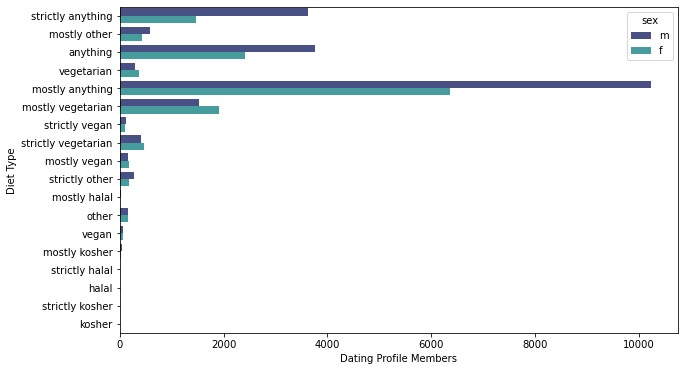

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=profiles, y='diet', hue='sex', palette='mako')
plt.ylabel('Diet Type')
plt.xlabel('Dating Profile Members')

### Distribution of Alcohol Use

The distribution of alchol use use was examined against sex. The majority of the program members indicated that they only drink socially.

Text(0.5, 0, 'Dating Profile Members')

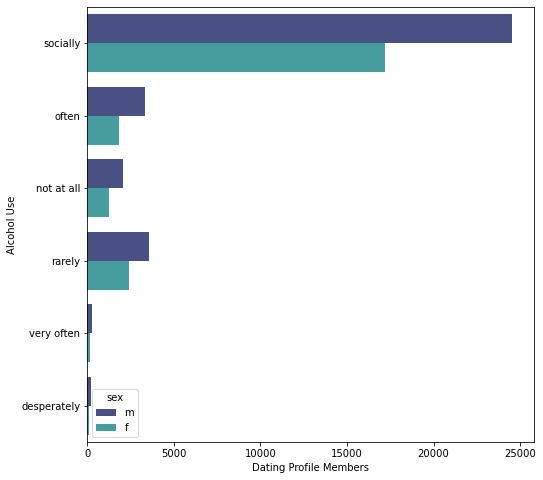

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(data=profiles, y='drinks', hue='sex', palette='mako')
plt.ylabel('Alcohol Use')
plt.xlabel('Dating Profile Members')

### Distribution of Drug Use

The distribution of drug use was examined against sex. The majority of the program members indicated that they would never use drugs. 

Text(0.5, 0, 'Dating Profile Members')

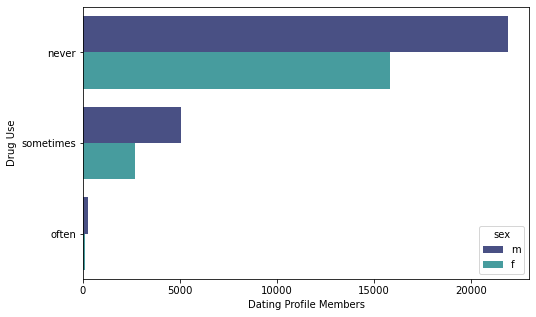

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data=profiles, y='drugs', hue='sex', palette='mako')
plt.ylabel('Drug Use')
plt.xlabel('Dating Profile Members')

### Distribution of Education

The distribution of education level was examined against sex. A majority of the program members have graduated from college/university. There are several details that stood out in this section, such as the amount of members who were involved in Space Camp. 

Text(0.5, 0, 'Dating Profile Members')

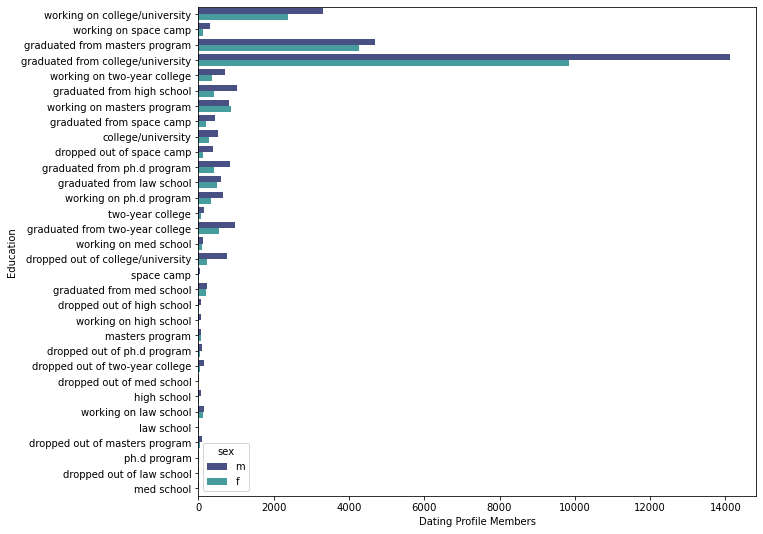

In [14]:
plt.figure(figsize=(10,9))
sns.countplot(data=profiles, y='education', hue='sex',palette='mako')
plt.ylabel('Education')
plt.xlabel('Dating Profile Members')

### Examining Ethnicity

Distribution of Ethnicity is hard to analyze with 217 unique selections. This process was examined to understand the different ethnicity options that were available for the members of the program to select. 

In [15]:
profiles.ethnicity.nunique()

217

In [16]:
profiles.ethnicity.unique()

array(['asian, white', 'white', nan, 'asian, black, other',
       'white, other', 'hispanic / latin, white', 'hispanic / latin',
       'pacific islander, white', 'asian', 'black, white',
       'pacific islander', 'asian, native american',
       'asian, pacific islander', 'black, native american, white',
       'middle eastern, other', 'native american, white', 'indian',
       'black', 'black, native american, hispanic / latin, other',
       'black, native american, hispanic / latin',
       'asian, black, pacific islander',
       'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other',
       'other', 'hispanic / latin, other', 'asian, black',
       'middle eastern, white', 'native american, white, other',
       'black, native american', 'black, white, other',
       'hispanic / latin, white, other', 'middle eastern', 'black, other',
       'native american, hispanic / latin, white', 'black, indian',
       'indian, white, othe

### Distribution of Jobs

The distribution of jobs was examined against sex. The distribution of jobs was fairly dependendent on sex as transportation, computer/hardware/software, and science/tech/engineering were more prevelant in male users while education/academia, clerical/administrative, and medicine/health were better represented by the female users. 

<AxesSubplot:xlabel='count', ylabel='job'>

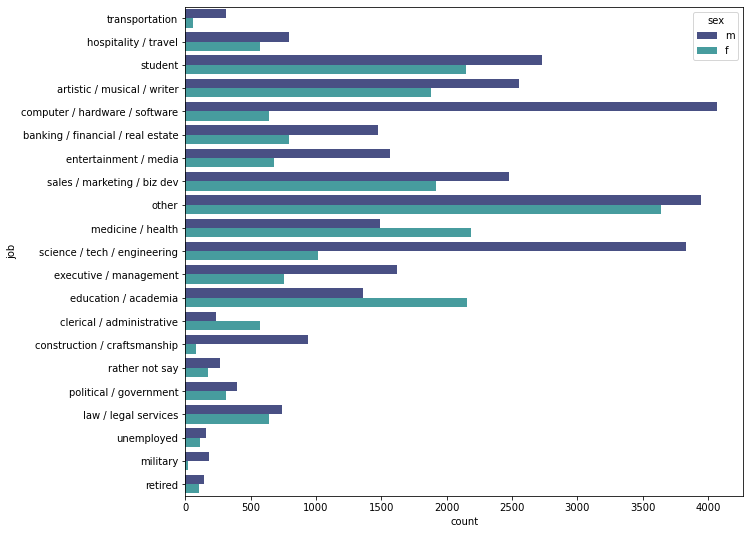

In [17]:
plt.figure(figsize=(10,9))
sns.countplot(data=profiles, y='job', hue='sex', palette='mako')

### Distribution of Religion
The distribution of religion was examined against sex. The options for religion included both the user’s religious beliefs plus their preference of religion (a gauge for how serious the user is about their religion). The religion column provided 45 unique options. The first word of these options were targeted to better understand the users religious beliefs without the preference. The new options for religion were detailed as 'religion_updated'. The religous beliefs of the user did not vary much depending on the sex of the user. 

In [18]:
profiles['religion'].nunique()

45

In [19]:
profiles['religion'].unique()

array(['agnosticism and very serious about it',
       'agnosticism but not too serious about it', nan, 'atheism',
       'christianity', 'christianity but not too serious about it',
       'atheism and laughing about it',
       'christianity and very serious about it', 'other', 'catholicism',
       'catholicism but not too serious about it',
       'catholicism and somewhat serious about it',
       'agnosticism and somewhat serious about it',
       'catholicism and laughing about it',
       'agnosticism and laughing about it', 'agnosticism',
       'atheism and somewhat serious about it',
       'buddhism but not too serious about it',
       'other but not too serious about it', 'buddhism',
       'other and laughing about it',
       'judaism but not too serious about it',
       'buddhism and laughing about it',
       'other and somewhat serious about it',
       'other and very serious about it',
       'hinduism but not too serious about it',
       'atheism but not too ser

<AxesSubplot:xlabel='count', ylabel='religion_updated'>

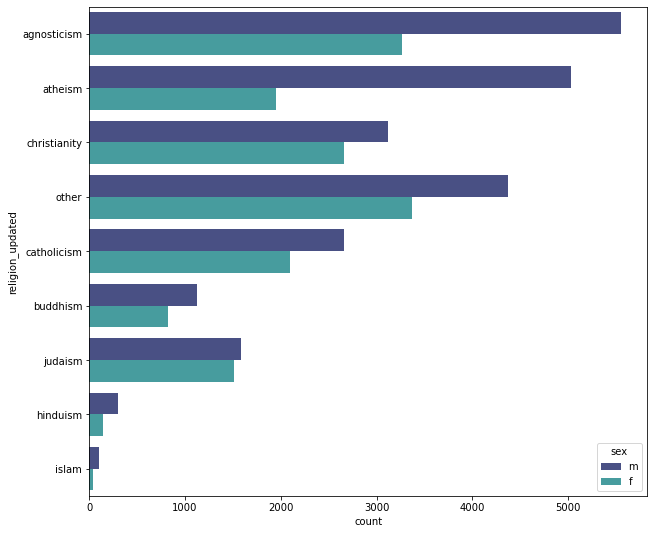

In [20]:
plt.figure(figsize=(10,9))
profiles['religion_updated'] = profiles.religion.str.split().str.get(0)
sns.countplot(data=profiles, y='religion_updated', hue='sex',palette='mako')

### Distribution of Offspring
The distribution of offspring and the users personal desire to have children was examined against sex. Categories that mostly feature the desire to not have kids tend to have more male representation; however, the numbers for each category are well-represented by both sexes. 

<AxesSubplot:xlabel='count', ylabel='offspring'>

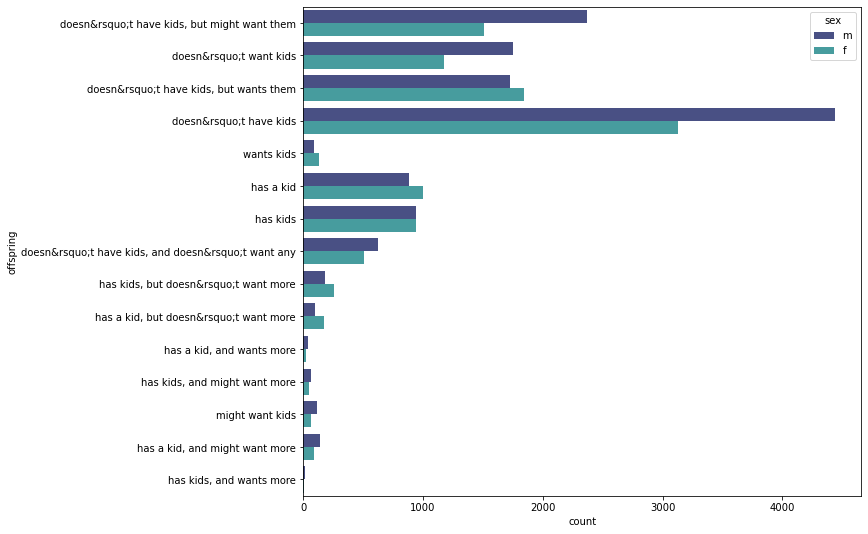

In [21]:
plt.figure(figsize=(10,9))
sns.countplot(data=profiles, y='offspring', hue='sex', palette='mako')

### Distribution of Sexual Orientation
The distribution of the users sexual orientation was examined against sex. A great majority of the users, male and female, indicated their sexual orientation was 'straight'. Bisexual orientation is more heavily distributed towards female users. 

<AxesSubplot:xlabel='count', ylabel='orientation'>

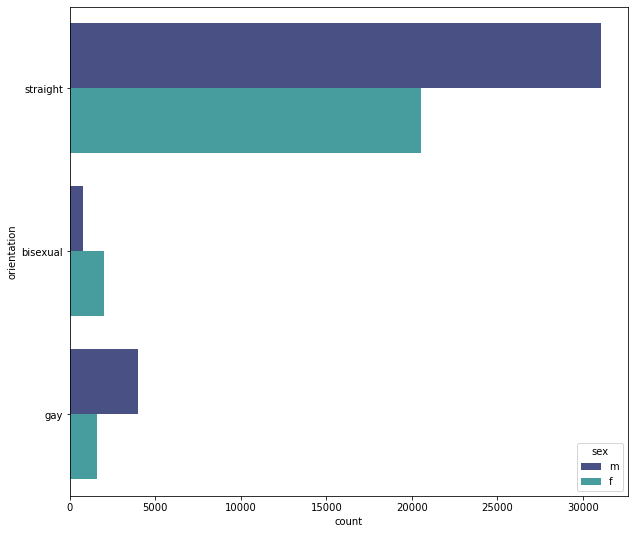

In [22]:
plt.figure(figsize=(10,9))
sns.countplot(data=profiles, y='orientation', hue='sex',palette='mako')

### Distribution of Pets
The distribution of the users opinion towards pets was examined against sex. A majority of the program members enjoy some type of pets; however, female users have more preference towards owning cats (despite having equal representation in liking cats) whereas male users have more preference towards liking dogs.

<AxesSubplot:xlabel='count', ylabel='pets'>

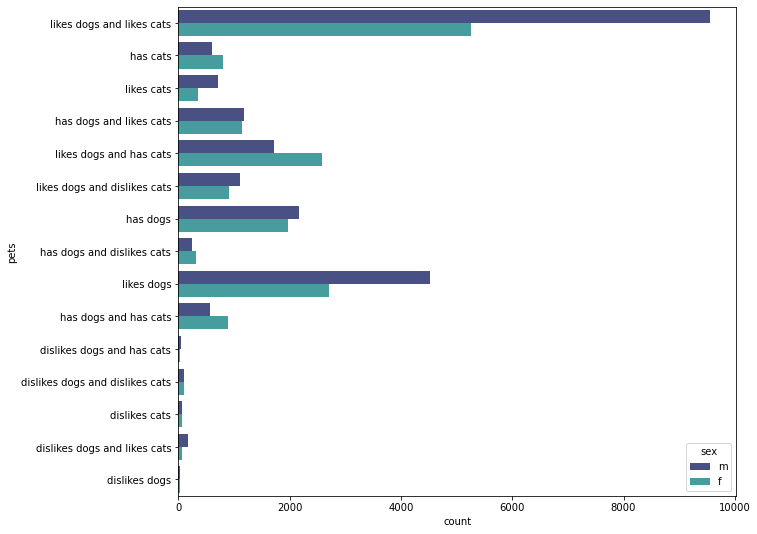

In [23]:
plt.figure(figsize=(10,9))
sns.countplot(data=profiles, y='pets', hue='sex',palette='mako')

### Distribution of Astrological Signs

The distribution of astrological signs was examined against sex. The options for astrological signs included both the user’s personal sign plus their preference for astrological signs (a gauge for how serious the user is about astrology and their personal signs). The astrological sign column provided 48 unique options. The first word of these options were targeted to better understand the user’s personal astrological signs without the preference. The new options for astrological signs are detailed as `signs_updated`. The astrological signs of the user did not vary much depending on the sex of the user, as predicted since this depends on the birthday of the user.

In [24]:
profiles['sign'].nunique()

48

In [25]:
profiles['sign'].unique()

array(['gemini', 'cancer', 'pisces but it doesn&rsquo;t matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'gemini but it doesn&rsquo;t matter',
       'cancer but it doesn&rsquo;t matter',
       'leo but it doesn&rsquo;t matter', nan,
       'aquarius but it doesn&rsquo;t matter',
       'aries and it&rsquo;s fun to think about',
       'libra but it doesn&rsquo;t matter',
       'pisces and it&rsquo;s fun to think about', 'libra',
       'taurus but it doesn&rsquo;t matter',
       'sagittarius but it doesn&rsquo;t matter',
       'scorpio and it matters a lot',
       'gemini and it&rsquo;s fun to think about',
       'leo and it&rsquo;s fun to think about',
       'cancer and it&rsquo;s fun to think about',
       'libra and it&rsquo;s fun to think about',
       'aquarius and it&rsquo;s fun to think about',
       'virgo but it doesn&rsquo;t matter',
       'scorpio and it&rsquo;s fun to think about',
       'capricorn but it doesn&rsquo;t matter', 'sc

<AxesSubplot:xlabel='count', ylabel='signs_updated'>

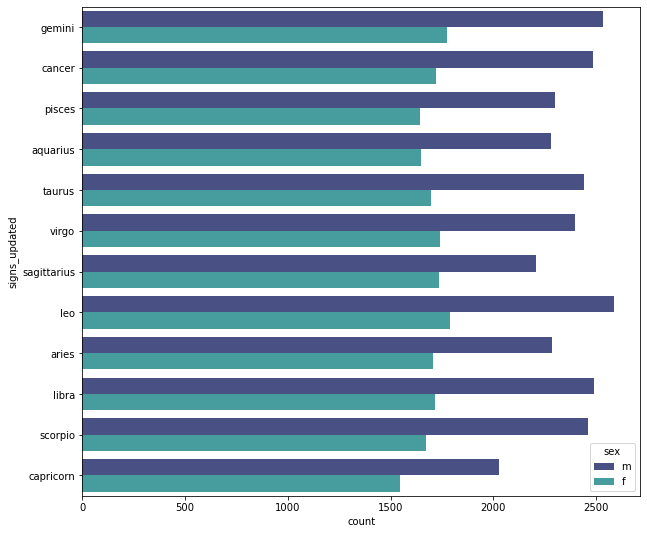

In [26]:
plt.figure(figsize=(10,9))
profiles['signs_updated'] = profiles.sign.str.split().str.get(0)
sns.countplot(data=profiles, y='signs_updated', hue='sex',palette='mako')

### Distribution of Smoking Habits

The distribution of the users smoking habits was examined against sex. Most of the users do not smoke and there was no indication that a users smoking habits were related to their sex. 

<AxesSubplot:xlabel='count', ylabel='smokes'>

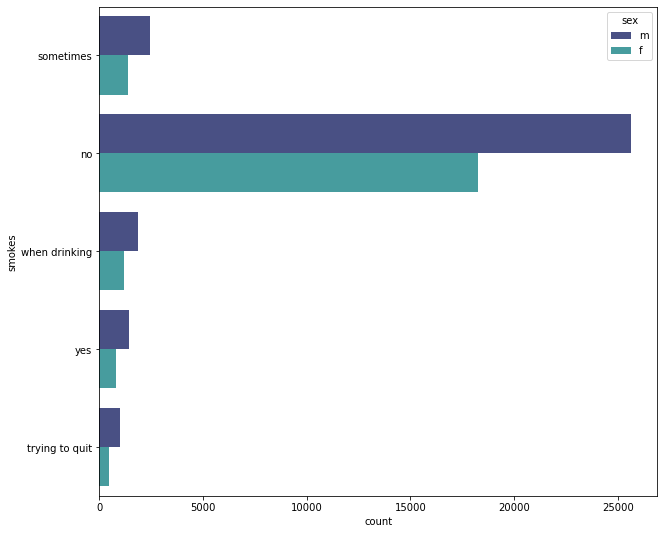

In [27]:
plt.figure(figsize=(10,9))
sns.countplot(data=profiles, y='smokes', hue='sex',palette='mako')

In [28]:
profiles.isnull().sum()

age                     0
body_type            5296
diet                24395
drinks               2985
drugs               14080
education            6628
essay0               5488
essay1               7572
essay2               9638
essay3              11476
essay4              10537
essay5              10850
essay6              13771
essay7              12451
essay8              19225
essay9              12603
ethnicity            5680
height                  3
income                  0
job                  8198
last_online             0
location                0
offspring           35561
orientation             0
pets                19921
religion            20226
sex                     0
sign                11056
smokes               5512
speaks                 50
status                  0
religion_updated    20226
signs_updated       11056
dtype: int64

### Predicting Religion from Other Factors

Utilizing three different models (Logirithmic Regression, K-Nearest Neighbors, and Decision Tree) this section works towards forming a model that predicts a user's Religion type based on other factors (Body Type, Diet, Orientation, Pets, Sex, Job, Astrological Signs). 

The 'cols' variable below is an array of different types of variables that could address the choice in one's Religious beliefs. 

In [29]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'sex', 'job', 'signs_updated', 'religion_updated']
df = profiles[cols].dropna()
df.shape

(16453, 8)

In [30]:
df

,body_type,diet,orientation,pets,sex,job,signs_updated,religion_updated
0,a little extra,strictly anything,straight,likes dogs and likes cats,m,transportation,gemini,agnosticism
1,average,mostly other,straight,likes dogs and likes cats,m,hospitality / travel,cancer,agnosticism
5,average,mostly anything,straight,likes cats,m,computer / hardware / software,taurus,atheism
7,average,mostly anything,straight,likes dogs and likes cats,f,artistic / musical / writer,sagittarius,christianity
9,athletic,mostly anything,straight,likes dogs and likes cats,m,student,cancer,atheism
...,...,...,...,...,...,...,...,...
59929,average,strictly vegetarian,straight,has dogs and likes cats,m,artistic / musical / writer,pisces,atheism
59930,curvy,anything,gay,likes dogs and likes cats,m,political / government,aries,other
59934,average,anything,straight,has dogs and has cats,f,other,pisces,judaism
59942,fit,mostly anything,straight,likes dogs and likes cats,m,entertainment / media,leo,agnosticism


In [31]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

#### Data Imbalance:

We can quickly detail that the machine learning model will not be the most accurate by finding the different value counts for Religious beliefs. Since there is a heavy favoritism in Agnosticism, Other, Atheism and Christianity, the machine learning model will be less accurate. 

In [32]:
df.religion_updated.value_counts()

agnosticism     3857
other           3516
atheism         2793
christianity    2227
catholicism     1937
judaism         1113
buddhism         816
hinduism         140
islam             54
Name: religion_updated, dtype: int64

#### 80/20 Split Data

The data needs to be split into both train and validation sets. 80% of the data is utilized for training the model while the other 20% of the data is reserved for the final validation.

In [33]:
col_length = len(df.columns)

#Y is the target column, X has the rest
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

#Validation chunk size
val_size = 0.2

#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state = 0)

#turn in to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

#### Logistic Regression Model - Religion

The accuracy of this model is approximately 30%. The results of this model indicate that this does not predict religion well.

In [35]:
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

In [36]:
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

 agnosticism       0.28      0.46      0.35      3059
     atheism       0.33      0.21      0.26      2225
    buddhism       0.50      0.00      0.00       675
 catholicism       0.27      0.17      0.21      1541
christianity       0.27      0.20      0.23      1783
    hinduism       0.40      0.03      0.06       116
       islam       0.80      0.10      0.18        39
     judaism       0.44      0.03      0.05       906
       other       0.31      0.48      0.38      2818

    accuracy                           0.30     13162
   macro avg       0.40      0.19      0.19     13162
weighted avg       0.32      0.30      0.27     13162



#### K-Nearest Neighbors - Religion

The accuracy of this model is approximately 46%. The results of this model indicate fairly poor results still, but are an improvement from the Logistic Regression Model

In [37]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [38]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

 agnosticism       0.42      0.72      0.53      3059
     atheism       0.47      0.47      0.47      2225
    buddhism       0.40      0.15      0.22       675
 catholicism       0.45      0.39      0.41      1541
christianity       0.48      0.37      0.42      1783
    hinduism       0.46      0.05      0.09       116
       islam       0.00      0.00      0.00        39
     judaism       0.43      0.19      0.26       906
       other       0.53      0.43      0.47      2818

    accuracy                           0.46     13162
   macro avg       0.40      0.31      0.32     13162
weighted avg       0.46      0.46      0.44     13162



#### Decision Tree - Religion

The accuracy of this model is approximately 87%, which predicts the Religion well; however, the Decision Tree depth was maxed out and there are 60 which indicates the model is overfit for the data. 

In [39]:
tree_model = DecisionTreeClassifier().fit(X_train, Y_train) 
tree_predictions = tree_model.predict(X_train) 

In [40]:
print(classification_report(Y_train, tree_predictions))

              precision    recall  f1-score   support

 agnosticism       0.79      0.97      0.87      3059
     atheism       0.86      0.90      0.88      2225
    buddhism       0.87      0.85      0.86       675
 catholicism       0.87      0.86      0.86      1541
christianity       0.91      0.83      0.87      1783
    hinduism       0.97      0.74      0.84       116
       islam       0.97      0.77      0.86        39
     judaism       0.94      0.81      0.87       906
       other       0.96      0.82      0.89      2818

    accuracy                           0.87     13162
   macro avg       0.91      0.84      0.87     13162
weighted avg       0.88      0.87      0.87     13162



In [41]:
tree_model.get_depth()

60

#### Confusion Matrix

A confusion matrix was developed to visually understand the sucess of the model. 

In [42]:
from sklearn.metrics import confusion_matrix 
tree_cm = confusion_matrix(Y_train, tree_predictions)
tree_labels = tree_model.classes_

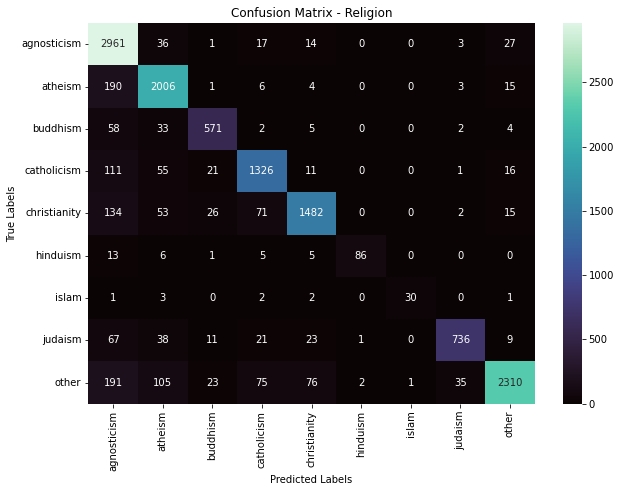

In [43]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(tree_cm, annot=True, ax = ax,fmt="d",cmap='mako');

ax.set_xlabel('Predicted Labels');
ax.set_ylabel('True Labels'); 
ax.set_title('Confusion Matrix - Religion');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(tree_labels); 
ax.yaxis.set_ticklabels(tree_labels);

#### Validation:
A five fold cross validation is created with the same data. The results are worse than the KNN with the baseline was ~21%.

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(tree_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.21382453 0.21154577 0.21010638 0.21352584 0.20212766]
Baseline: 21.02% (0.43%)


### Predicting Body Type from Other Factors

Utilizing three different models (Logirithmic Regression, K-Nearest Neighbors, and Decision Tree) this section works towards forming a model that predicts a user's body type based on other factors (Religion, Diet, Orientation, Pets, Sex, Job, Astrological Signs). 

In [45]:
cols2 = ['religion_updated', 'diet', 'orientation', 'pets', 'sex', 'job', 'signs_updated','body_type']
df2 = profiles[cols2].dropna()
df2.shape

(16453, 8)

In [46]:
df2

,religion_updated,diet,orientation,pets,sex,job,signs_updated,body_type
0,agnosticism,strictly anything,straight,likes dogs and likes cats,m,transportation,gemini,a little extra
1,agnosticism,mostly other,straight,likes dogs and likes cats,m,hospitality / travel,cancer,average
5,atheism,mostly anything,straight,likes cats,m,computer / hardware / software,taurus,average
7,christianity,mostly anything,straight,likes dogs and likes cats,f,artistic / musical / writer,sagittarius,average
9,atheism,mostly anything,straight,likes dogs and likes cats,m,student,cancer,athletic
...,...,...,...,...,...,...,...,...
59929,atheism,strictly vegetarian,straight,has dogs and likes cats,m,artistic / musical / writer,pisces,average
59930,other,anything,gay,likes dogs and likes cats,m,political / government,aries,curvy
59934,judaism,anything,straight,has dogs and has cats,f,other,pisces,average
59942,agnosticism,mostly anything,straight,likes dogs and likes cats,m,entertainment / media,leo,fit


In [47]:
for col in cols2[:-1]:
    df2 = pd.get_dummies(df2, columns=[col], prefix = [col])

In [48]:
df2

,body_type,religion_updated_agnosticism,religion_updated_atheism,religion_updated_buddhism,religion_updated_catholicism,religion_updated_christianity,religion_updated_hinduism,religion_updated_islam,religion_updated_judaism,religion_updated_other,...,signs_updated_cancer,signs_updated_capricorn,signs_updated_gemini,signs_updated_leo,signs_updated_libra,signs_updated_pisces,signs_updated_sagittarius,signs_updated_scorpio,signs_updated_taurus,signs_updated_virgo
0,a little extra,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,average,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,average,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,average,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,athletic,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59929,average,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
59930,curvy,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
59934,average,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
59942,fit,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Data Imbalance:

We can quickly detail that the machine learning model will not be the most accurate by finding the different value counts for Body Type. Since there is a heavy favoritism in Average, Fit, and Atletic, the machine learning model will be less accurate. This is similiar to the religion models.

In [49]:
df2.body_type.value_counts()

average           4447
fit               3622
athletic          3186
curvy             1458
thin              1383
a little extra     991
skinny             481
full figured       379
overweight         174
jacked             147
used up            139
rather not say      46
Name: body_type, dtype: int64

In [50]:
col2_length = len(df2.columns)

#Y is the target column, X has the rest
X = df2.iloc[:, 1:col2_length]
Y = df2.iloc[:, 0:1]

#Validation chunk size
val_size = 0.2

#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train_2, X_val_2, Y_train_2, Y_val_2 = train_test_split(X, Y, test_size=val_size, random_state = 0)

#turn in to 1d arrays
Y_train_2 = Y_train_2.to_numpy().ravel()
Y_val_2 = Y_val_2.to_numpy().ravel()

#### Logistic Regression Model - Body Type

The accuracy of this model is approximately 31%. The results of this model indicate that this does not predict body type well.

In [51]:
lr_model_2 = LogisticRegression(multi_class="multinomial").fit(X_train_2, Y_train_2)
lr_predictions_2 = lr_model_2.predict(X_train_2)

In [52]:
print(classification_report(Y_train_2, lr_predictions_2))

                precision    recall  f1-score   support

a little extra       0.17      0.00      0.00       784
      athletic       0.37      0.34      0.35      2531
       average       0.30      0.60      0.40      3582
         curvy       0.30      0.30      0.30      1155
           fit       0.30      0.26      0.28      2866
  full figured       0.44      0.01      0.03       310
        jacked       0.67      0.02      0.03       115
    overweight       0.00      0.00      0.00       143
rather not say       0.00      0.00      0.00        42
        skinny       0.00      0.00      0.00       393
          thin       0.26      0.01      0.02      1136
       used up       0.00      0.00      0.00       105

      accuracy                           0.31     13162
     macro avg       0.23      0.13      0.12     13162
  weighted avg       0.29      0.31      0.27     13162



#### K-Nearest Neighbors - Body Type

The accuracy of this model is approximately 47%. The results of this model indicate fairly poor results still, but are an improvement from the Logistic Regression Model for estimating body type.

In [53]:
knn_model_2 = KNeighborsClassifier(n_neighbors = 5).fit(X_train_2, Y_train_2)
knn_predictions_2 = knn_model_2.predict(X_train_2)

In [54]:
print(classification_report(Y_train_2, knn_predictions_2))

                precision    recall  f1-score   support

a little extra       0.32      0.39      0.35       784
      athletic       0.46      0.63      0.53      2531
       average       0.48      0.62      0.54      3582
         curvy       0.48      0.45      0.46      1155
           fit       0.50      0.42      0.46      2866
  full figured       0.51      0.11      0.18       310
        jacked       0.38      0.03      0.05       115
    overweight       0.00      0.00      0.00       143
rather not say       0.00      0.00      0.00        42
        skinny       0.50      0.08      0.13       393
          thin       0.44      0.19      0.27      1136
       used up       0.40      0.02      0.04       105

      accuracy                           0.47     13162
     macro avg       0.37      0.24      0.25     13162
  weighted avg       0.46      0.47      0.44     13162



#### Decision Tree - Body Type

The accuracy of this model is approximately 88%, which predicts the body type well; however, the Decision Tree depth was maxed out and there are 56 which indicates the model is overfit for the data. 

In [55]:
tree_model_2 = DecisionTreeClassifier().fit(X_train_2, Y_train_2) 
tree_predictions_2 = tree_model_2.predict(X_train_2) 

In [56]:
print(classification_report(Y_train_2, tree_predictions_2))

                precision    recall  f1-score   support

a little extra       0.77      0.95      0.85       784
      athletic       0.82      0.95      0.88      2531
       average       0.87      0.91      0.89      3582
         curvy       0.92      0.91      0.92      1155
           fit       0.93      0.83      0.88      2866
  full figured       0.98      0.84      0.90       310
        jacked       0.98      0.77      0.86       115
    overweight       0.99      0.80      0.88       143
rather not say       0.97      0.79      0.87        42
        skinny       0.96      0.78      0.86       393
          thin       0.98      0.78      0.87      1136
       used up       1.00      0.79      0.88       105

      accuracy                           0.88     13162
     macro avg       0.93      0.84      0.88     13162
  weighted avg       0.89      0.88      0.88     13162



In [57]:
tree_model_2.get_depth()

56

#### Confusion Matrix

A confusion matrix was developed to visually understand the sucess of the model. 

In [58]:
tree_cm_2 = confusion_matrix(Y_train_2, tree_predictions_2)
tree_labels_2 = tree_model_2.classes_

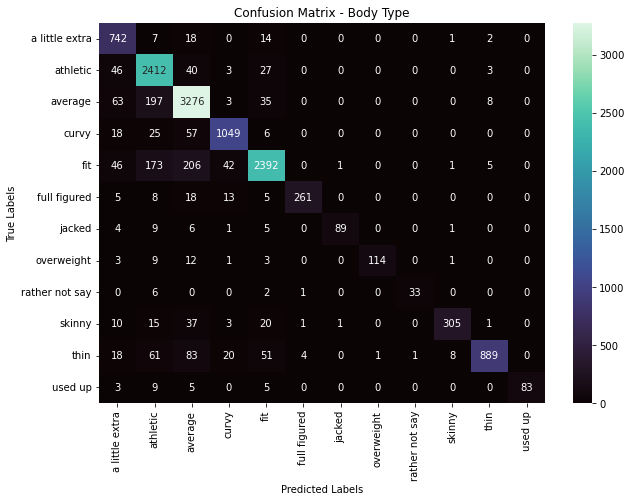

In [59]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(tree_cm_2, annot=True, ax = ax,fmt="d", cmap='mako');

ax.set_xlabel('Predicted Labels');
ax.set_ylabel('True Labels'); 
ax.set_title('Confusion Matrix - Body Type');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(tree_labels_2); 
ax.yaxis.set_ticklabels(tree_labels_2);

#### Validation:
A five fold cross validation is created with the same data. The results are worse than the KNN with the baseline was ~22%.

In [60]:
kfold_2 = KFold(n_splits=5, shuffle=True, random_state=0)
results_2 = cross_val_score(tree_model_2, X_train_2, Y_train_2, cv=kfold, scoring='accuracy')

print(results_2)
print("Baseline: %.2f%% (%.2f%%)" % (results_2.mean()*100, results_2.std()*100))

[0.23053551 0.22977592 0.22834347 0.2112462  0.21276596]
Baseline: 22.25% (0.86%)


### Predicting Astrological Signs from Other Factors

Utilizing three different models (Logirithmic Regression, K-Nearest Neighbors, and Decision Tree) this section works towards forming a model that predicts a user's astrological sign based on other factors (Religion, Diet, Orientation, Pets, Sex, Job, Body Type). 

In [61]:
cols3 = ['body_type','religion_updated', 'diet', 'orientation', 'pets', 'sex', 'job', 'signs_updated']
df3 = profiles[cols3].dropna()
df3.shape

(16453, 8)

In [62]:
for col in cols3[:-1]:
    df3 = pd.get_dummies(df3, columns=[col], prefix = [col])

In [63]:
df3

,signs_updated,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59929,pisces,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59930,aries,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
59934,pisces,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
59942,leo,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Balanced Data

As opposed to the previous two categories (Religion and Body Type), the data here is well-distributed throughout each category, making the machine learning prediction more accurate. 

In [64]:
df3.signs_updated.value_counts()

leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: signs_updated, dtype: int64

In [65]:
col3_length = len(df3.columns)

#Y is the target column, X has the rest
X = df3.iloc[:, 1:col3_length]
Y = df3.iloc[:, 0:1]

#Validation chunk size
val_size = 0.2

#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train_3, X_val_3, Y_train_3, Y_val_3 = train_test_split(X, Y, test_size=val_size, random_state = 0)

#turn in to 1d arrays
Y_train_3 = Y_train_3.to_numpy().ravel()
Y_val_3 = Y_val_3.to_numpy().ravel()

#### Logistic Regression Model - Astrological Signs

The accuracy of this model is approximately 12%. The results of this model indicate that this does not predict astrological signs well.

In [66]:
lr_model_3 = LogisticRegression(multi_class="multinomial").fit(X_train_3, Y_train_3)
lr_predictions_3 = lr_model_3.predict(X_train_3)

In [67]:
print(classification_report(Y_train_3, lr_predictions_3))

              precision    recall  f1-score   support

    aquarius       0.12      0.08      0.09      1031
       aries       0.11      0.08      0.10      1043
      cancer       0.13      0.22      0.16      1190
   capricorn       0.12      0.04      0.06       952
      gemini       0.12      0.13      0.12      1200
         leo       0.12      0.20      0.15      1208
       libra       0.12      0.09      0.11      1090
      pisces       0.11      0.07      0.09      1059
 sagittarius       0.13      0.10      0.12      1051
     scorpio       0.13      0.05      0.07      1072
      taurus       0.13      0.12      0.12      1102
       virgo       0.12      0.22      0.16      1164

    accuracy                           0.12     13162
   macro avg       0.12      0.12      0.11     13162
weighted avg       0.12      0.12      0.11     13162



#### K-Nearest Neighbors - Astrological Signs

The accuracy of this model is approximately 33%. The results of this model indicate fairly poor results still, but are an improvement from the Logistic Regression Model for estimating astrological signs.

In [68]:
knn_model_3 = KNeighborsClassifier(n_neighbors = 5).fit(X_train_3, Y_train_3)
knn_predictions_3 = knn_model_3.predict(X_train_3)

In [69]:
print(classification_report(Y_train_3, knn_predictions_3))

              precision    recall  f1-score   support

    aquarius       0.26      0.66      0.37      1031
       aries       0.27      0.53      0.36      1043
      cancer       0.30      0.43      0.35      1190
   capricorn       0.31      0.33      0.32       952
      gemini       0.35      0.30      0.32      1200
         leo       0.40      0.28      0.33      1208
       libra       0.37      0.27      0.31      1090
      pisces       0.41      0.24      0.31      1059
 sagittarius       0.41      0.21      0.28      1051
     scorpio       0.41      0.23      0.30      1072
      taurus       0.41      0.23      0.29      1102
       virgo       0.41      0.26      0.32      1164

    accuracy                           0.33     13162
   macro avg       0.36      0.33      0.32     13162
weighted avg       0.36      0.33      0.32     13162



#### Decision Tree - Astrological Signs

The accuracy of this model is approximately 78%, which predicts the astrological sign well; however, the Decision Tree depth was maxed out and there are 58 which indicates the model is overfit for the data. 

In [70]:
tree_model_3 = DecisionTreeClassifier().fit(X_train_3, Y_train_3) 
tree_predictions_3 = tree_model_3.predict(X_train_3) 

In [71]:
print(classification_report(Y_train_3, tree_predictions_3))

              precision    recall  f1-score   support

    aquarius       0.66      0.94      0.78      1031
       aries       0.66      0.87      0.75      1043
      cancer       0.69      0.85      0.77      1190
   capricorn       0.74      0.83      0.78       952
      gemini       0.78      0.79      0.78      1200
         leo       0.79      0.80      0.79      1208
       libra       0.78      0.76      0.77      1090
      pisces       0.82      0.73      0.77      1059
 sagittarius       0.91      0.69      0.78      1051
     scorpio       0.87      0.71      0.78      1072
      taurus       0.92      0.70      0.79      1102
       virgo       0.91      0.67      0.77      1164

    accuracy                           0.78     13162
   macro avg       0.79      0.78      0.78     13162
weighted avg       0.80      0.78      0.78     13162



In [72]:
tree_model_3.get_depth()

58

#### Confusion Matrix

A confusion matrix was developed to visually understand the sucess of the model. 

In [73]:
tree_cm_3 = confusion_matrix(Y_train_3, tree_predictions_3)
tree_labels_3 = tree_model_3.classes_

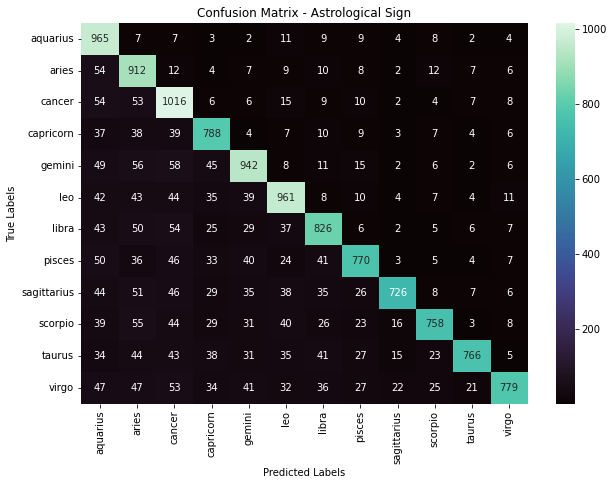

In [74]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(tree_cm_3, annot=True, ax = ax,fmt="d",cmap='mako');

ax.set_xlabel('Predicted Labels');
ax.set_ylabel('True Labels'); 
ax.set_title('Confusion Matrix - Astrological Sign');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(tree_labels_3); 
ax.yaxis.set_ticklabels(tree_labels_3);

#### Validation:
A five fold cross validation is created with the same data. The results are worse than the KNN with the baseline was ~9%.

In [75]:
kfold_3 = KFold(n_splits=5, shuffle=True, random_state=0)
results_3= cross_val_score(tree_model_3, X_train_3, Y_train_3, cv=kfold, scoring='accuracy')

print(results_3)
print("Baseline: %.2f%% (%.2f%%)" % (results_3.mean()*100, results_3.std()*100))

[0.08393468 0.09950627 0.10030395 0.08244681 0.07636778]
Baseline: 8.85% (0.96%)


# Conclusions: 

* Data visualization proved that some categories tend to have a relationship with the sex of the user, while most do not. 
* The machine learning models used for predicting various user categories proved to be not the most accurate: 
  * For predicting religion, the data was found to be skewed towards four specific religions (Agnosticism, Other, Atheism, Christianity) making the prediction lean towards those options. This can be easily visualized in the confusion matrix heatmap showing that true positives for the other religions aren't as available. The analysis was still conducted and the model with the best results came from the Decision Tree model; however, this model was vastly overfit with a depth of almost 60. The K Nearest Neighbors model would be the most accurate model with a 46% accuracy.
  * For predicting body type, similar results were found to religion with heavy data imbalance towards specific body types. This can be easily visualized in the confusion matrix heatmap showing that true positives for the other body types not as well-represented aren't as available. The analysis was still conducted and the model with the best results came from the Decision Tree model; however, this model was vastly overfit with a depth of almost 60. The K Nearest Neighbors model would be the most accurate model with a 46% accuracy.
  * For predicting astrological signs, the data was not imbalanced as opposed to the data for religion and body type. The analysis was conducted and the model with the best results came from the Decision Tree model; however, this model was vastly overfit with a depth of almost 60. The K Nearest Neighbors model would be the most accurate model with a 33% accuracy. 

  

# Future Projects:

* Future analysis can try:
    * Capping the depth of the Decision Tree Model to see if there's a better represented model than the KNN model without overfitting for the data. 
    * Providing different machine learning models (ADABoost, Random Forest, etc.) to see if other models better predict religion, body type, and astrological signs.
    * Conducting the same three models for other categorical variables to see if any of these yield better results. 
    